In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/instacart-market-basket-analysis/orders.csv
/kaggle/input/instacart-market-basket-analysis/departments.csv
/kaggle/input/instacart-market-basket-analysis/products.csv
/kaggle/input/instacart-market-basket-analysis/sample_submission.csv
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv
/kaggle/input/instacart-market-basket-analysis/aisles.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import time 
color= sns.color_palette()
%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
# PRODUCT DATA
product_d= pd.read_csv("../input/instacart-market-basket-analysis/products.csv")
# ORDER PRIOR DATA
order_product_pr_d= pd.read_csv("../input/instacart-market-basket-analysis/order_products__prior.csv")
# DEPARTMENT_DATA 
department_d= pd.read_csv("../input/instacart-market-basket-analysis/departments.csv")
# ORDER DATA
order_d= pd.read_csv("../input/instacart-market-basket-analysis/orders.csv")
# AISLES DATA
aisles_d= pd.read_csv("../input/instacart-market-basket-analysis/aisles.csv")
# ORDER PRODUCT DATA
order_product_tr_d= pd.read_csv("../input/instacart-market-basket-analysis/order_products__train.csv")
# SUBMISSION DATA
submission_d= pd.read_csv("../input/instacart-market-basket-analysis/sample_submission.csv")

In [4]:
product_d.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
aisles_d.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
order_product_pr_d.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_product_pr_d["reordered"].sum()/ order_product_pr_d.shape[0]

0.5896974667922161

* We see that almost 59 % of the prodicts are reordered in the arean

In [8]:
order_product_pr_d["reordered"].sum()/ order_product_pr_d.shape[0]

0.5896974667922161

In [9]:
order_product_tr_d.head(100)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
95,170,6236,4,1
96,170,5077,5,1
97,170,8153,6,0
98,170,43772,7,0


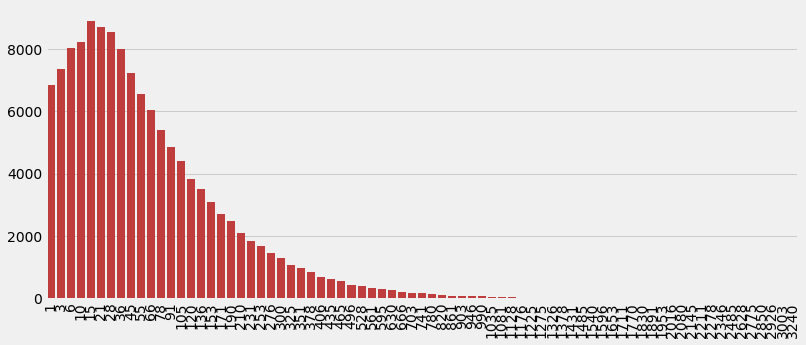

In [10]:
plt.figure(figsize=(12,5))
ord_tr= order_product_tr_d.groupby("order_id")["add_to_cart_order"].aggregate("sum").reset_index()
ord_tr= ord_tr["add_to_cart_order"].value_counts()
sns.barplot(ord_tr.index, ord_tr.values,color= color[3])
plt.xticks(rotation="vertical")
plt.show()

In [11]:
order_product_tr_d["reordered"].sum()/ order_product_tr_d.shape[0]

0.5985944127509629

* We see that almost 60 % of the prodicts are reordered in the arean

In [12]:
order_d.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


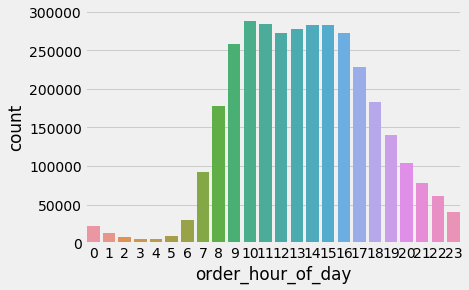

In [13]:
sns.countplot(order_d["order_hour_of_day"])

* We can see that the higher number of orders happened by the afternoon time

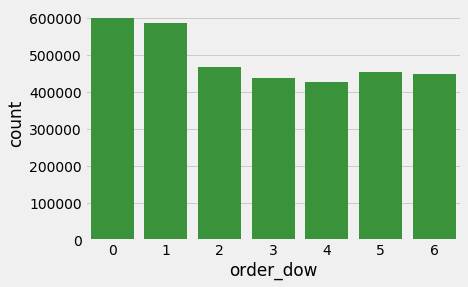

In [14]:
sns.countplot(order_d["order_dow"], color= color[2])

* Sunday and Monday have the highest number of orders, while Thursday has the lowest number of the order

* Now let us blend both of the above plots into one heat map

In [15]:
grouped_df = order_d.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

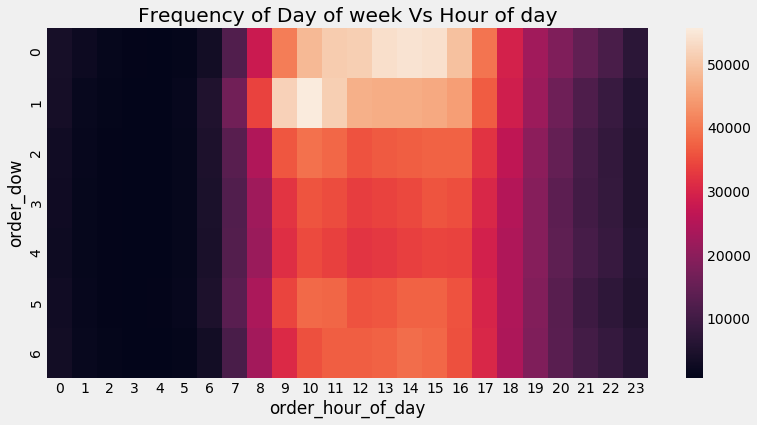

In [16]:
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [17]:
grouped_df

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


In [18]:
crs= order_d.groupby("user_id")["order_number"].aggregate(np.max).reset_index()

In [19]:
crs_count= crs['order_number'].value_counts()

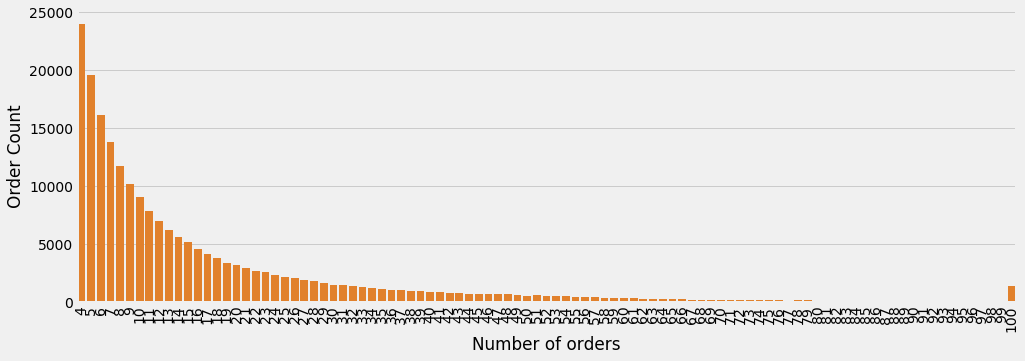

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(crs_count.index, crs_count.values, color=color[1])
plt.xlabel("Number of orders")
plt.ylabel("Order Count")
plt.xticks(rotation="vertical")
plt.show()

In [21]:
order_d.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


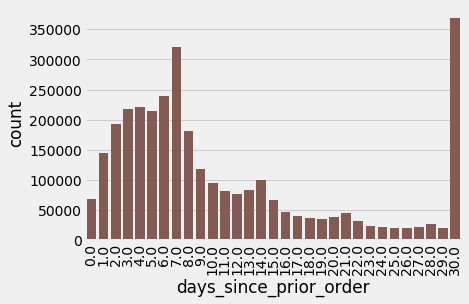

In [22]:
sns.countplot(order_d["days_since_prior_order"], color= color[5])
plt.xticks(rotation="vertical")
plt.show()

* Looked like most of the customers with a week gap and rather month's gap

In [23]:
department_d.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


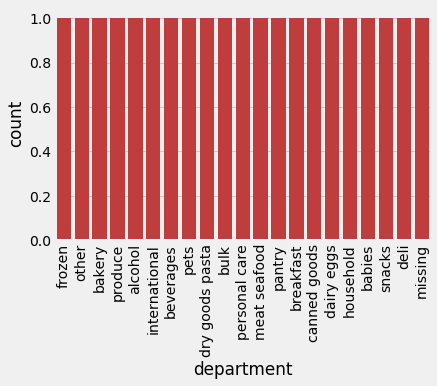

In [24]:
sns.countplot(department_d["department"], color=color[3])
plt.xticks(rotation="vertical")
plt.show()

In [25]:
order_products_pr_d = pd.merge(order_product_pr_d, product_d, on='product_id', how='left')
order_products_pr_d = pd.merge(order_products_pr_d, aisles_d, on='aisle_id', how='left')
order_products_pr_d = pd.merge(order_products_pr_d, department_d, on='department_id', how='left')
order_products_pr_d.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [26]:
order_products_pr_d["product_name"].value_counts().reset_index().head(10)

,index,product_name
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


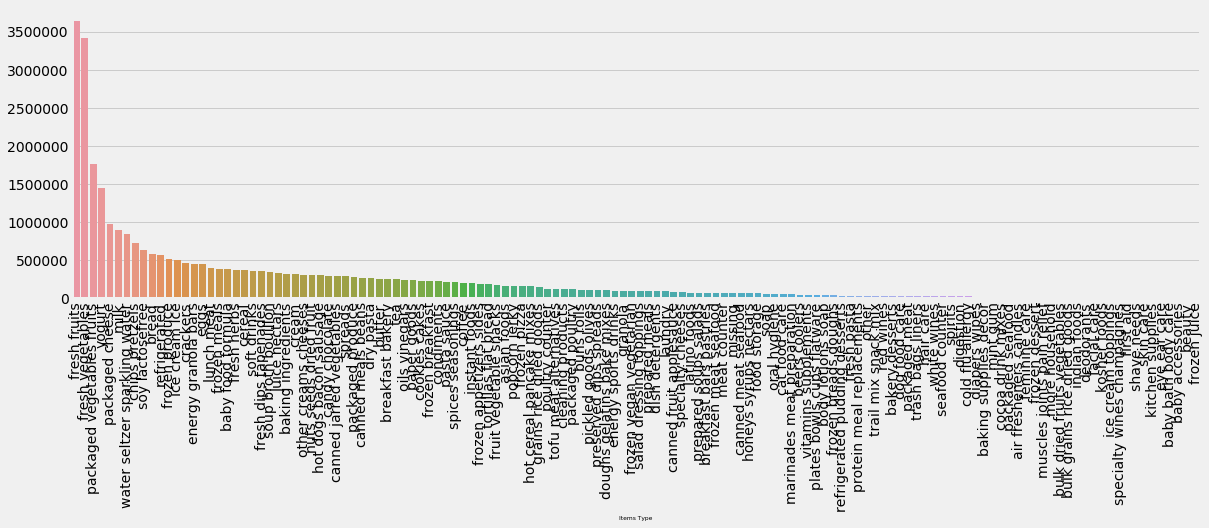

In [27]:
plt.figure(figsize=(18,5))
asile_count= order_products_pr_d["aisle"].value_counts()
sns.barplot(asile_count.index, asile_count.values)
plt.xlabel("Items Type",fontsize=6)
plt.xticks(rotation="vertical")
plt.show()

Text(0.5, 1.0, 'Department Distribution')

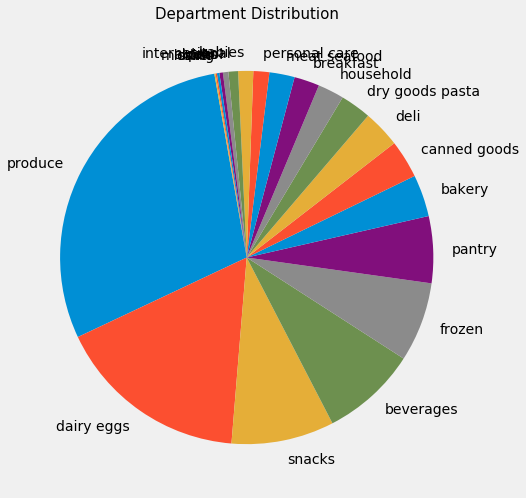

In [28]:
plt.figure(figsize=(8,8))
dep_det= order_products_pr_d["department"].value_counts()
labels= (np.array(dep_det.index))
sizes= (np.array((dep_det/dep_det.sum())*100))
plt.pie(sizes, labels= labels, startangle= 100)
plt.xticks(roation="vertical")
plt.title("Department Distribution", fontsize= 15)

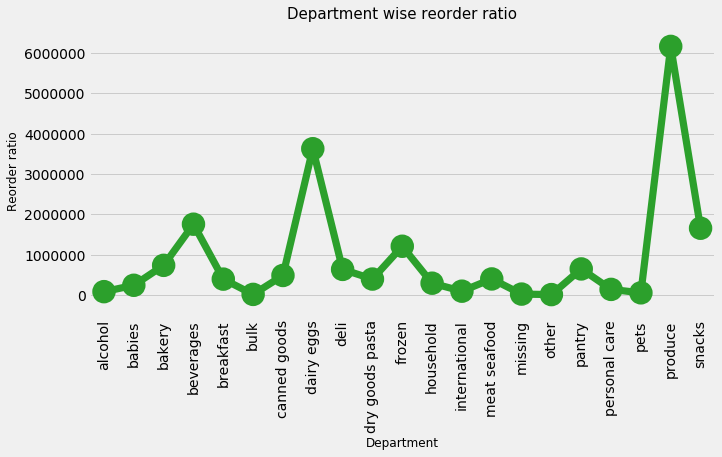

In [29]:
order_pr_det= order_products_pr_d.groupby("department")["reordered"].aggregate("sum").reset_index()
plt.figure(figsize=(10,5))
sns.pointplot(order_pr_det['department'].values, order_pr_det['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()